## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice.
mouse_count = len(combined_mouse_results["Mouse ID"].unique())
print(mouse_count)

249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_mouse_results[["Mouse ID", "Timepoint"]]
mouse = duplicates[duplicates.duplicated()]
mouse

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 



In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# used code from classmate Hilary Keoerner for this cell
# https://github.com/HilaryKoerner/matplotlib_challenge/blob/main/Pymaceuticals_final.ipynb
mouse_df = combined_mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_df = mouse_df[mouse_df["Mouse ID"] !="g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_df["Mouse ID"].unique())
print(mouse_count)

248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats = mouse_df.groupby(['Drug Regimen'])
tumor_mean = tumor_stats["Tumor Volume (mm3)"].mean()
tumor_median = tumor_stats["Tumor Volume (mm3)"].median()
tumor_var = tumor_stats["Tumor Volume (mm3)"].var()
tumor_std = tumor_stats["Tumor Volume (mm3)"].std()
tumor_sem = tumor_stats["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Mean": tumor_mean,
                         "Median": tumor_median,
                         "Variance": tumor_var,
                         "Std Dev": tumor_std,
                         "SEM": tumor_sem
                        })
tumor_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# https://pbpython.com/groupby-agg.html
# agg_func_stats = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Establish Data to be plotted 
# tumor_stats = mouse_df.groupby(['Drug Regimen'])
measurement_count = tumor_stats['Tumor Volume (mm3)'].count()
measurement_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Text(0, 0.5, 'Number of Measurements Taken')

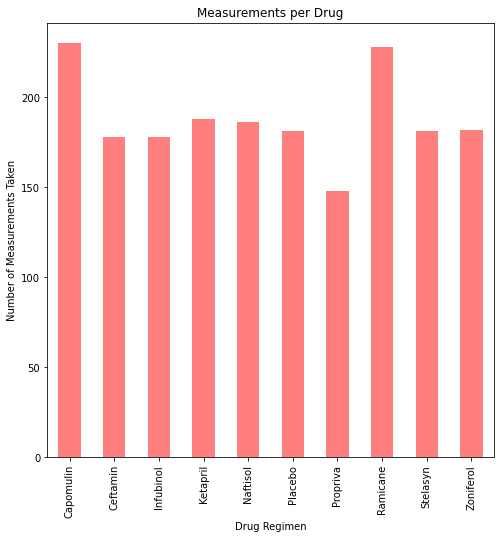

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurement_count.plot.bar(color='r', alpha=0.5, align="center", figsize=(8,8))
plt.title("Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

Text(0, 0.5, 'Number of Measurements Taken')

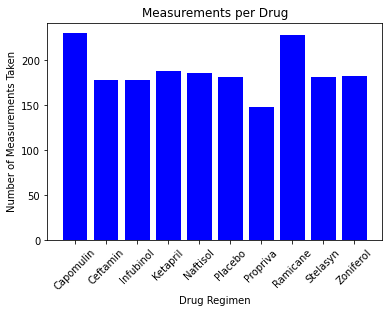

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
measurement_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(measurement_count))
plt.bar(x_axis, measurement_count, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation=45)
plt.title("Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

In [21]:
# establish data to be plotted
gender = mouse_df.drop_duplicates("Mouse ID").groupby(['Sex'])
gender_dist = gender['Mouse ID'].count()
gender_dist

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcd9675b4c0>,
 [Text(-2.199823484668395, 0.027868195158622665, 'Female'),
  Text(2.199823484668395, -0.027868195158622933, 'Male')],
 [Text(-1.1999037189100337, 0.015200833722885089, '49.6%'),
  Text(1.1999037189100337, -0.015200833722885235, '50.4%')])

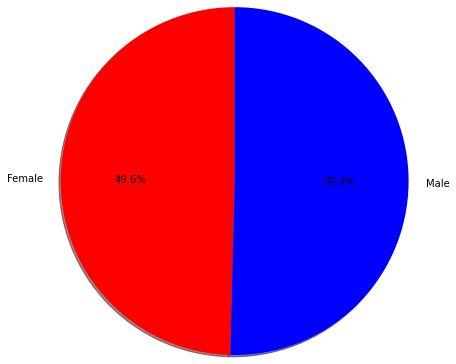

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]
sizes = gender_dist
colors = ["red", "blue"]

plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90, radius=2)

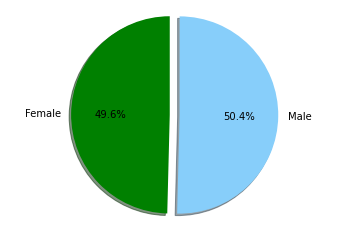

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
gender = [123, 125]
colors = ["green", "lightskyblue"]
explode = (0, 0.1)
plt.pie(gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Find last or max time point and rename column
last_timepoint = mouse_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
last_timepoint 

# Merge to bring new column into original dataframe
merged_df = pd.merge(mouse_df, last_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
